In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC


sns.set_theme(style="whitegrid", palette="pastel")

## Analyzing the dataset

In [57]:
# load the dataset
df = pd.read_csv("biodegradable_a.csv")

df.describe(include="all")

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,Biodegradable
count,4564.000000,4564.000000,4564.000000,4049.000000,4564.000000,4564.000000,4564.000000,3797.000000,3893.000000,4564.000000,...,4564.000000,4564.000000,4564.000000,3206.000000,4104.000000,4564.000000,4564.000000,4564.000000,3882.000000,4564
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3825
mean,4.553679,3.103605,0.180762,0.010373,0.264680,0.069676,0.886503,35.100603,1.225790,2.048642,...,0.332603,0.415644,0.777388,3.594392,2.633800,0.267090,8.133804,0.091805,0.170273,NaN
std,0.480677,0.618921,0.775172,0.127266,1.219524,0.541474,1.429565,8.287902,1.333277,1.509354,...,0.903048,1.296882,1.160364,0.588620,0.615330,0.683133,0.897383,0.415705,1.151995,NaN
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,NaN
25%,4.297888,2.736054,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,3.361406,2.188000,0.000000,7.700582,0.000000,0.000000,NaN
50%,4.579039,3.078901,0.000000,0.000000,0.000000,0.000000,0.000000,33.300000,1.000000,2.000000,...,0.000000,0.000000,0.000000,3.529299,2.565157,0.000000,8.090426,0.000000,0.000000,NaN
75%,4.869022,3.417500,0.000000,0.000000,0.000000,0.000000,2.000000,41.362696,2.000000,3.000000,...,0.000000,0.000000,1.000000,3.732744,2.952000,0.000000,8.560427,0.000000,0.000000,NaN


In [58]:
df['Biodegradable'].value_counts()

Biodegradable
RB     3825
NRB     739
Name: count, dtype: int64

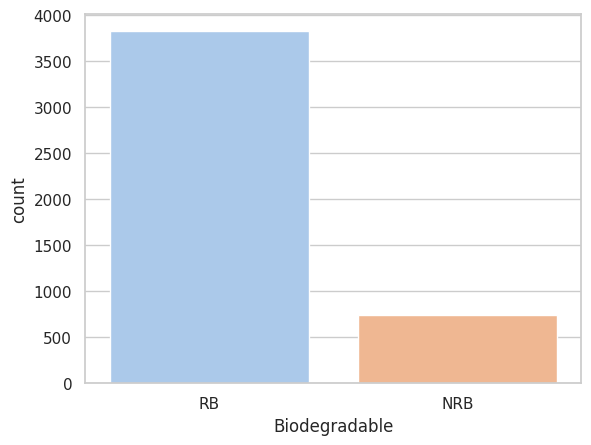

In [59]:
sns.countplot(data=df, x='Biodegradable')
plt.show()

In [60]:
df_missing = df.describe(include = 'all')

df_missing.loc['dtype'] = df.dtypes
df_missing.loc['size'] = len(df)
df_missing.loc['percentage count (missing values)'] = df.isnull().mean()

df_missing

,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,Biodegradable
count,4564.0,4564.0,4564.0,4049.0,4564.0,4564.0,4564.0,3797.0,3893.0,4564.0,...,4564.0,4564.0,4564.0,3206.0,4104.0,4564.0,4564.0,4564.0,3882.0,4564
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3825
mean,4.553679,3.103605,0.180762,0.010373,0.26468,0.069676,0.886503,35.100603,1.22579,2.048642,...,0.332603,0.415644,0.777388,3.594392,2.6338,0.26709,8.133804,0.091805,0.170273,NaN
std,0.480677,0.618921,0.775172,0.127266,1.219524,0.541474,1.429565,8.287902,1.333277,1.509354,...,0.903048,1.296882,1.160364,0.58862,0.61533,0.683133,0.897383,0.415705,1.151995,NaN
min,2.0,0.8039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.267,1.467,0.0,4.917,0.0,0.0,NaN
25%,4.297888,2.736054,0.0,0.0,0.0,0.0,0.0,30.0,0.0,1.0,...,0.0,0.0,0.0,3.361406,2.188,0.0,7.700582,0.0,0.0,NaN
50%,4.579039,3.078901,0.0,0.0,0.0,0.0,0.0,33.3,1.0,2.0,...,0.0,0.0,0.0,3.529299,2.565157,0.0,8.090426,0.0,0.0,NaN
75%,4.869022,3.4175,0.0,0.0,0.0,0.0,2.0,41.362696,2.0,3.0,...,0.0,0.0,1.0,3.732744,2.952,0.0,8.560427,0.0,0.0,NaN


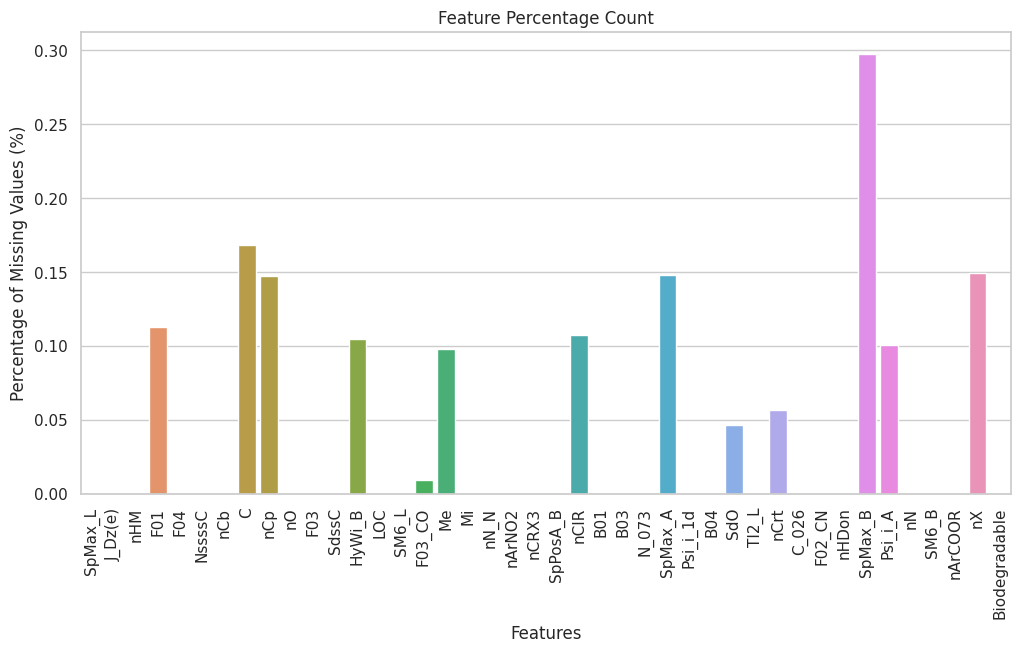

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_missing.T.reset_index(), x='index', y='percentage count (missing values)')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Feature Percentage Count')
plt.show()

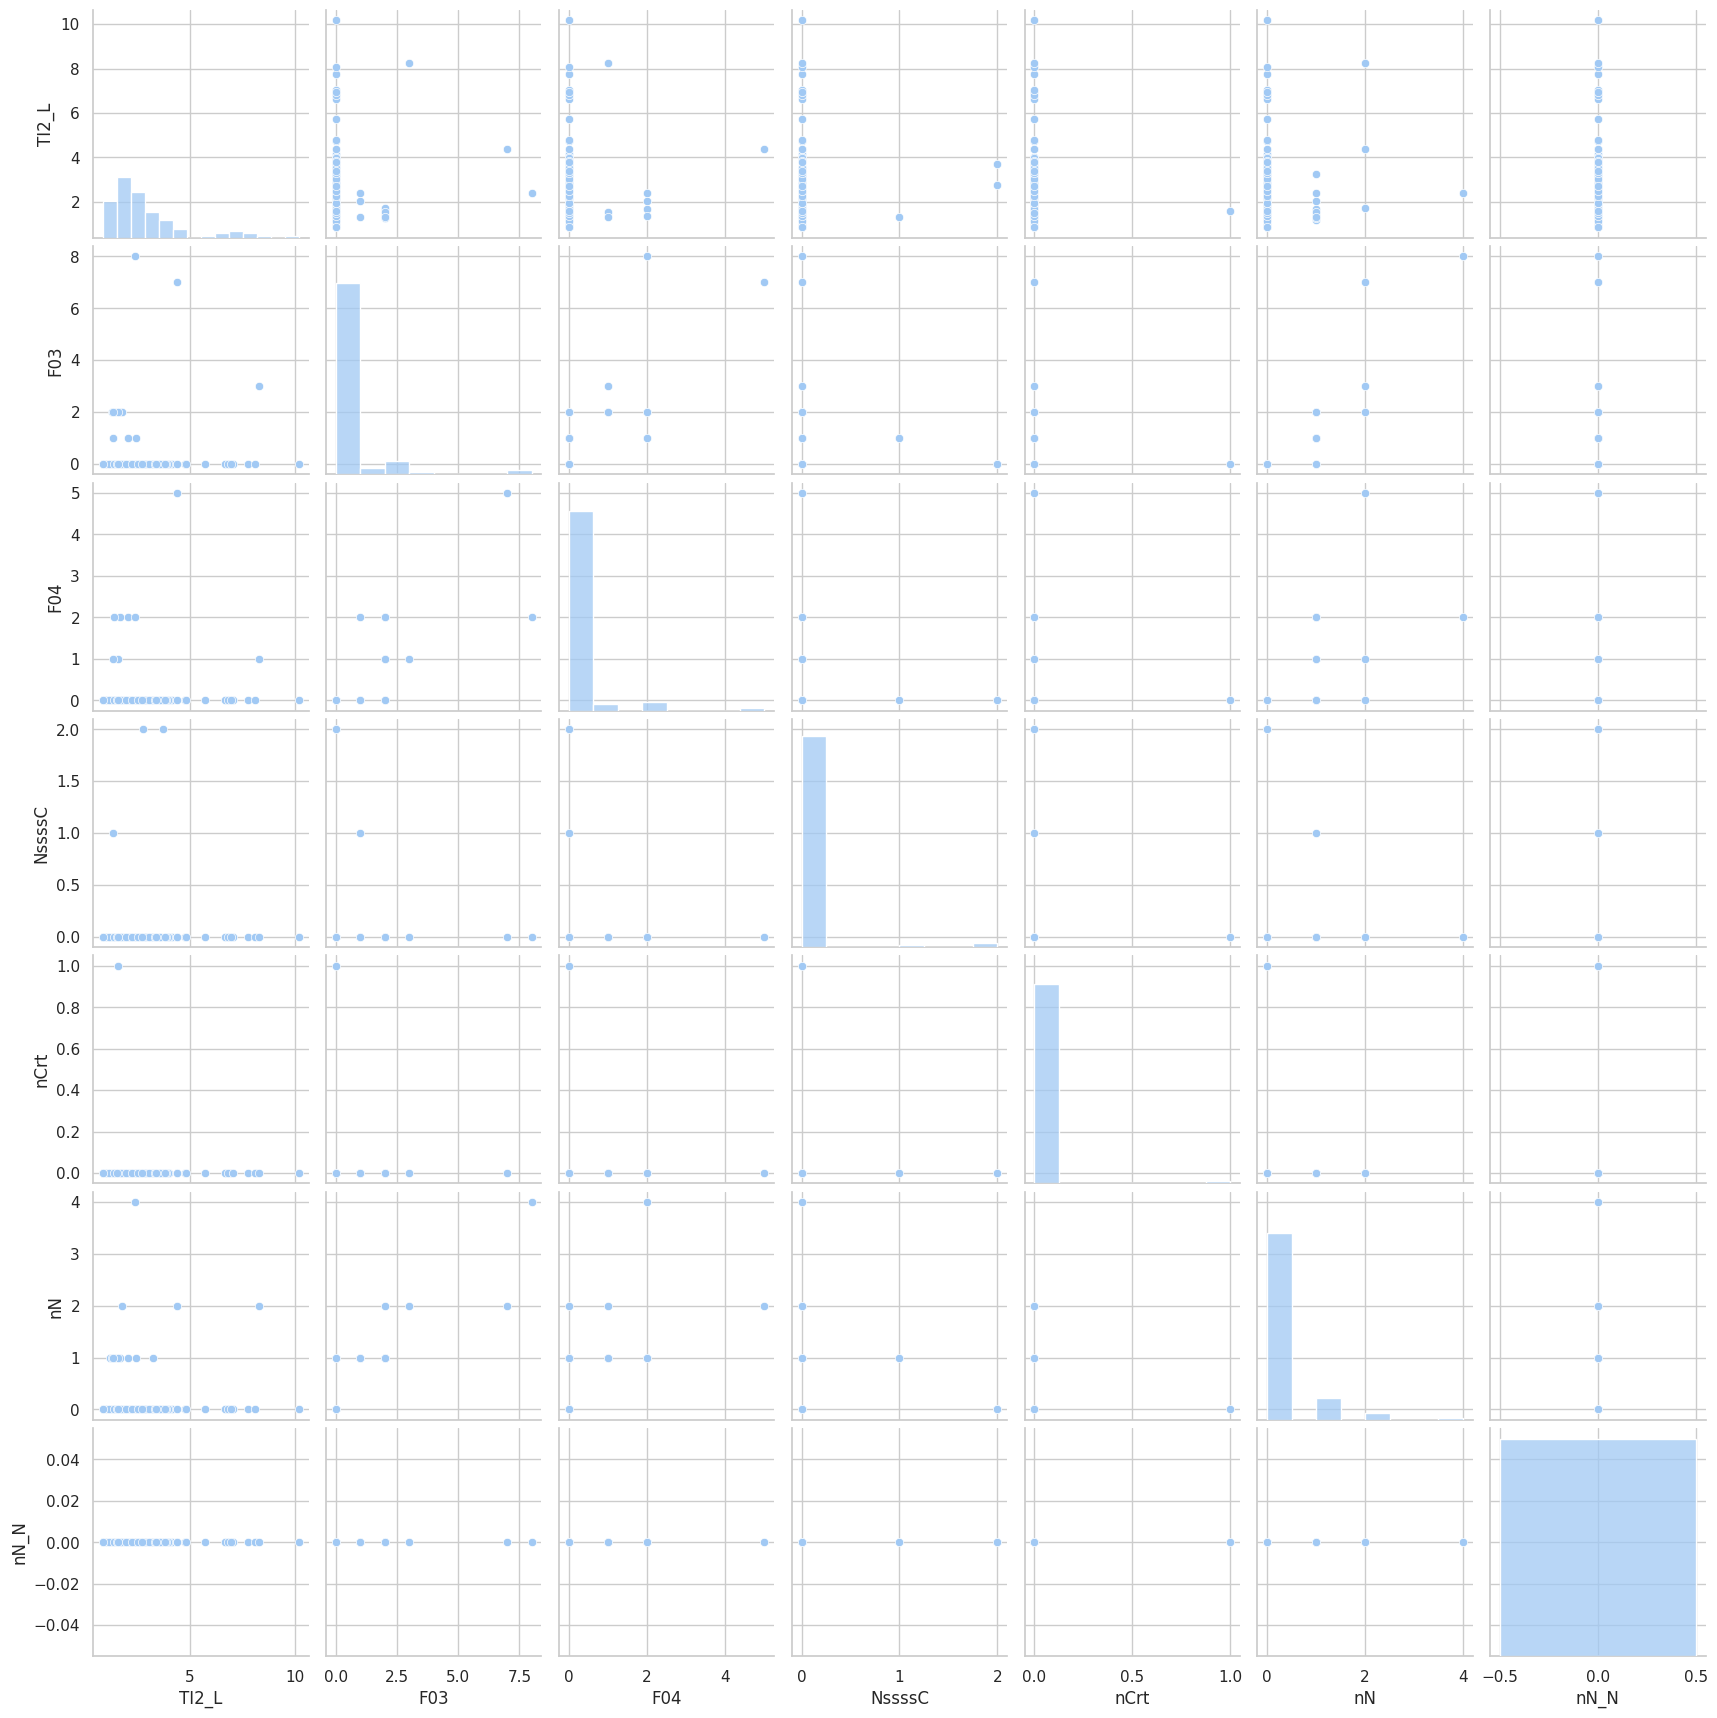

In [62]:
sns.pairplot(df.sample(100).sample(7, axis=1))
plt.show()

## Processing the data
### train test split

In [63]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Biodegradable', axis=1), 
                                                    df['Biodegradable'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [64]:
# heuristic to get numerical columns
# based on number of unique values they contain
def get_categorical_numerical_columns(df, max_unique_ratio=0.05):
    categorical_columns = []
    numerical_columns = []

    total_rows = df.shape[0]
    max_unique_values = int(total_rows * max_unique_ratio)

    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values <= max_unique_values:
            categorical_columns.append(column)
        else:
            numerical_columns.append(column)

    return categorical_columns, numerical_columns

In [65]:
categorical_cols, numerical_cols = get_categorical_numerical_columns(df)
categorical_cols.remove("Biodegradable")

### preprocessing

In [66]:
# preprocessor for categorical and numerical columns
# eliminates NaN values, (...)
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(missing_values=np.nan, strategy='median'), numerical_cols),
    ('cat', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), categorical_cols),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

## Models to be tested (SelectKbest)
SelectKbest feature selection

In [67]:
# different simple models to test
models = [
    ('logistic_regression', Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_classif)),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000))
    ])),
    ('svm', Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_classif)),
        ('scaler', StandardScaler()),
        ('model', SVC(probability=True))
    ])),
    ('random_forest', Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_classif)),
        ('model', RandomForestClassifier())
    ]))
]

SelectKbest hyperparameters

In [68]:
# hyperparameters to optimize for each model
# range of reasonable values based on documentation and other stuff
param_grids = [
    {
        'feature_selection__k': [5, 10, 'all'],
        'model__C': [0.1, 1, 10],
        'model__penalty': ['l2']
    },
    {
        'feature_selection__k': [5, 10, 'all'],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    {
        'feature_selection__k': [5, 10, 15, 20, 25, 30, 35, 40, 'all'],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [5, 10, 20]
    }
]

## Testing the models

auxiliary function to plot confusion matrix

In [69]:
def plot_confusion_matrix(cm, labels, ax):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix')
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

[ Model: logistic_regression ]
Best hyperparameters for logistic_regression: {'feature_selection__k': 'all', 'model__C': 0.1, 'model__penalty': 'l2'}
AUC score for the test set using the best logistic_regression: 0.9733851573349592
[[131  25]
 [ 17 740]]
              precision    recall  f1-score   support

         NRB       0.89      0.84      0.86       156
          RB       0.97      0.98      0.97       757

    accuracy                           0.95       913
   macro avg       0.93      0.91      0.92       913
weighted avg       0.95      0.95      0.95       913


-------------------------------------------

[ Model: svm ]
Best hyperparameters for svm: {'feature_selection__k': 'all', 'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
AUC score for the test set using the best svm: 0.9802103444771872
[[136  20]
 [ 19 738]]
              precision    recall  f1-score   support

         NRB       0.88      0.87      0.87       156
          RB       0.97      0.97

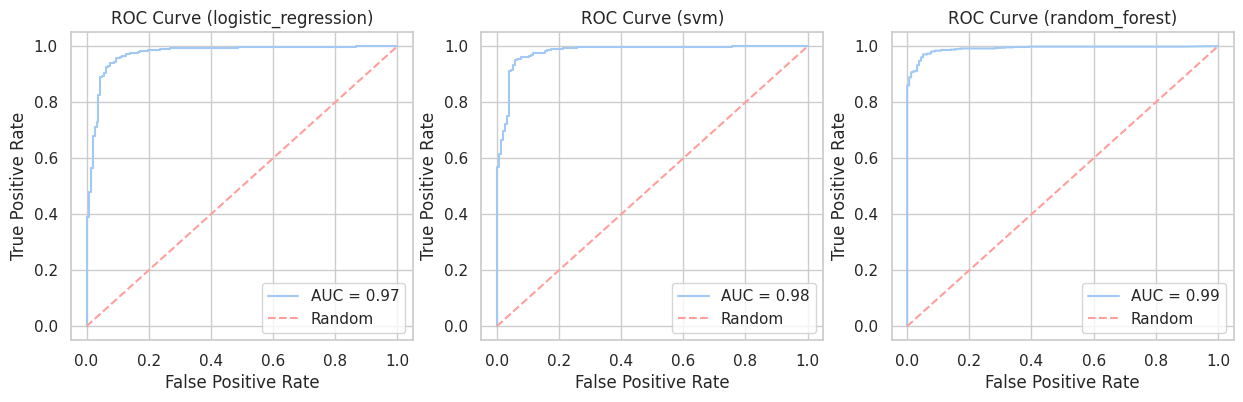

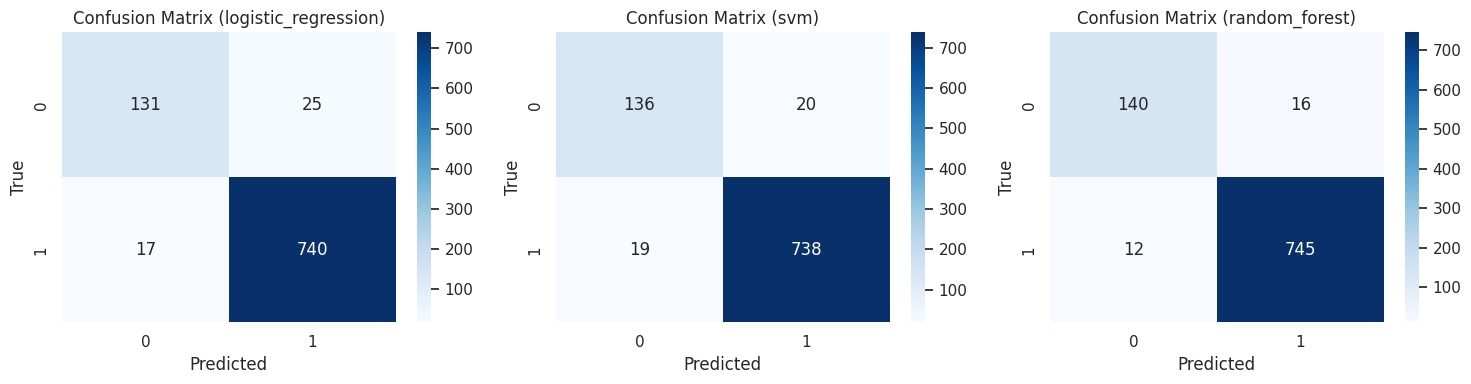

In [70]:
num_models = len(models)

# Create subplots for ROC curves
fig, axs_roc = plt.subplots(1, num_models, figsize=(5*num_models, 4))

# Create subplots for confusion matrices
fig, axs_cm = plt.subplots(1, num_models, figsize=(5*num_models, 4))

for i, model in enumerate(models):
    print(f"[ Model: {model[0]} ]")
    pipeline = model[1]
    param_grid = param_grids[i]

    # initialize the GridSearchCV object with the pipeline, parameter grid, and scoring metric
    cv_pipeline = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')

    # fit the GridSearchCV object to the training data
    cv_pipeline.fit(X_train, y_train)

    print(f"Best hyperparameters for {model[0]}: {cv_pipeline.best_params_}")
    
    # best estimator from GridSearchCV
    best_model = cv_pipeline.best_estimator_

    # predict the test data using the best model and print the AUC score
    y_pred_proba = cv_pipeline.predict_proba(X_test)[:, 1]
    y_pred = cv_pipeline.predict(X_test)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC score for the test set using the best {model[0]}: {auc_score}")

    # calculate the false positive rate (FPR), true positive rate (TPR), and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='RB')
    roc_auc = auc(fpr, tpr)

    # create RocCurveDisplay object
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

    # plot ROC curve in the corresponding subplot
    roc_ax = axs_roc[i]
    roc_display.plot(ax=roc_ax)
    roc_ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
    roc_ax.set_xlabel('False Positive Rate')
    roc_ax.set_ylabel('True Positive Rate')
    roc_ax.set_title(f'ROC Curve ({model[0]})')
    roc_ax.legend(loc='lower right')

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # plot confusion matrix using seaborn's heatmap
    cm_ax = axs_cm[i]
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=cm_ax)
    cm_ax.set_title(f'Confusion Matrix ({model[0]})')
    cm_ax.set_xlabel('Predicted')
    cm_ax.set_ylabel('True')

    # print classification report
    print(cm)
    print(classification_report(y_test, y_pred))
    print()
    print("-------------------------------------------")
    print()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [53]:
best_model = cv_pipeline.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['SpMax_L', 'J_Dz(e)', 'C',
                                                   'SdssC', 'HyWi_B', 'LOC',
                                                   'SM6_L', 'Me', 'Mi',
                                                   'SpPosA_B', 'SpMax_A',
                                                   'Psi_i_1d', 'SdO', 'TI2_L',
                                                   'SpMax_B', 'Psi_i_A',
                                                   'SM6_B']),
                                                 ('cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['nHM', 'F01', 'F04',
                                                   'NssssC', 'nCb', 'nCp', 'nO',
                                                   'F03', 'F03_C...
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['nHM', 'F01', 'F04',
                                                   'NssssC', 'nCb', 'nCp', 'nO',
                                                   'F03', 'F03_CO', 'nN_N',
                                                   'nArNO2', 'nCRX3', 'nCIR',
                                                   'B01', 'B03', 'N_073', 'B04',
                                                   'nCrt', 'C_026', 'F02_CN',
                                                   'nHDon', 'nN', 'nArCOOR',
                                                   'nX'])])),
                ('feature_selection', SelectKBest(k='all')),
                ('model',
                 RandomForestClassifier(max_depth=20, n_estimators=200))])